# Re-do cell analysis with corrected data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import naludaq
print(f"Naludaq version: {naludaq.__version__}")

Naludaq version: 0.31.7


In [4]:
from naludaq.backend import DiskAcquisition

ACQ_PATH = "data/SineWave_100MHz/"
channels = 4
# DiskAcquisition is recommended to be used as a context manager for safety
with DiskAcquisition(ACQ_PATH) as acq:
    print("Board model:", acq.params["model"])
    print("Number of events:", len(acq))
    print("Pedestals stored:", acq.pedestals is not None)

acq= DiskAcquisition(ACQ_PATH)

from naludaq.tools.pedestals.pedestals_correcter import PedestalsCorrecter
pedestals=acq.pedestals
params = acq.params
corrector = PedestalsCorrecter(params, pedestals)

Board model: dsa-c10-8
Number of events: 1013
Pedestals stored: True


In [14]:
def mVconverter(x, p, N=1024):
    p=np.array(p, dtype=np.float64)
    cell_indices = np.arange(N) % 128 
    A = p[cell_indices, 0]
    B = p[cell_indices, 1]
    C = p[cell_indices, 2]
    D = p[cell_indices, 3]
    z = (x - D) / A
    return (np.arctanh((x - D) / A) - C) / B


##  THIS IS TO BE CHAANGED IF WE AACCEPT THIS METHOD, TAKE THE NEW RRAY COMING FROM THE NEW VALUES
param_array = [[ 2.83889024e+03,  5.08393423e-03, -4.34456305e-01,  1.16290064e+03],
 [ 2.66481077e+03,  5.47769661e-03, -4.26223665e-01,  1.07378658e+03],
 [ 2.83860731e+03,  5.02548257e-03, -4.22895332e-01,  1.13491357e+03],
 [ 2.97755928e+03,  4.97106508e-03, -4.63185299e-01,  1.28921064e+03],
 [ 2.97788176e+03,  4.88071042e-03, -4.46570602e-01,  1.24774294e+03],
 [ 2.69215441e+03,  5.38475685e-03, -4.28091564e-01,  1.08536752e+03],
 [ 3.06668603e+03,  4.74646351e-03, -4.55350942e-01,  1.30580657e+03],
 [ 2.95466708e+03,  4.83648758e-03, -4.39302347e-01,  1.21895367e+03],
 [ 2.92617460e+03,  4.96980526e-03, -4.48258252e-01,  1.22883990e+03],
 [ 2.66435754e+03,  5.41219045e-03, -4.24429956e-01,  1.06761562e+03],
 [ 2.60355377e+03,  5.50085714e-03, -4.10809232e-01,  1.01301509e+03],
 [ 3.10599405e+03,  4.71581032e-03, -4.52916485e-01,  1.31820027e+03],
 [ 2.81439926e+03,  5.11662831e-03, -4.22203854e-01,  1.12343165e+03],
 [ 2.72177244e+03,  5.25508974e-03, -4.19555301e-01,  1.08032084e+03],
 [ 2.60029182e+03,  5.50766907e-03, -4.22255588e-01,  1.03870613e+03],
 [ 2.95270798e+03,  4.96560821e-03, -4.49572185e-01,  1.24631655e+03],
 [ 2.78981574e+03,  5.19230469e-03, -4.41615049e-01,  1.15895796e+03],
 [ 2.69869628e+03,  5.33560006e-03, -4.33538391e-01,  1.10292510e+03],
 [ 2.92286557e+03,  4.85725559e-03, -4.36012053e-01,  1.19901903e+03],
 [ 2.73979672e+03,  5.24843697e-03, -4.25104505e-01,  1.09998893e+03],
 [ 2.76494627e+03,  5.26578054e-03, -4.40526393e-01,  1.14533813e+03],
 [ 2.69132555e+03,  5.39226219e-03, -4.32020088e-01,  1.09501826e+03],
 [ 2.98788674e+03,  4.93210035e-03, -4.75860734e-01,  1.32311752e+03],
 [ 2.60988560e+03,  5.53008356e-03, -4.30896884e-01,  1.05965403e+03],
 [ 2.83500817e+03,  5.13176809e-03, -4.51432974e-01,  1.19892492e+03],
 [ 2.75275263e+03,  5.32411829e-03, -4.46238283e-01,  1.15409987e+03],
 [ 2.58175632e+03,  5.51375744e-03, -4.08966292e-01,  1.00227065e+03],
 [ 3.02687733e+03,  4.87896046e-03, -4.72351416e-01,  1.33523882e+03],
 [ 2.70813805e+03,  5.38925955e-03, -4.46495111e-01,  1.13794704e+03],
 [ 2.92058685e+03,  5.05210654e-03, -4.61158629e-01,  1.26178420e+03],
 [ 2.73480564e+03,  5.34466615e-03, -4.46339775e-01,  1.14717736e+03],
 [ 3.06583898e+03,  4.89869755e-03, -4.84783813e-01,  1.38145106e+03],
 [ 2.70602230e+03,  5.41163752e-03, -4.55001082e-01,  1.15369940e+03],
 [ 2.97084240e+03,  4.87475292e-03, -4.52859664e-01,  1.25914899e+03],
 [ 3.04203565e+03,  4.78081658e-03, -4.65459916e-01,  1.32004732e+03],
 [ 2.90098458e+03,  4.97393982e-03, -4.42474308e-01,  1.20519001e+03],
 [ 2.74992836e+03,  5.29173709e-03, -4.40865542e-01,  1.13883715e+03],
 [ 2.68400040e+03,  5.47014442e-03, -4.44374841e-01,  1.11936653e+03],
 [ 2.59072736e+03,  5.49222683e-03, -4.12216678e-01,  1.01023252e+03],
 [ 2.63189460e+03,  5.49523809e-03, -4.20991466e-01,  1.04654165e+03],
 [ 2.48991816e+03,  5.77747156e-03, -4.13055571e-01,  9.74975830e+02],
 [ 2.43172511e+03,  5.95096370e-03, -4.11182076e-01,  9.48587687e+02],
 [ 2.56466064e+03,  5.60323020e-03, -4.29447377e-01,  1.03944497e+03],
 [ 2.52762324e+03,  5.86761424e-03, -4.52264755e-01,  1.07319734e+03],
 [ 2.58349182e+03,  5.62905154e-03, -4.36606705e-01,  1.06373366e+03],
 [ 2.54907731e+03,  5.80269858e-03, -4.43959817e-01,  1.06447218e+03],
 [ 2.50406930e+03,  5.76627726e-03, -4.28031025e-01,  1.01244719e+03],
 [ 2.98754994e+03,  4.99533493e-03, -4.78391011e-01,  1.32861590e+03],
 [ 2.83743827e+03,  5.18898636e-03, -4.65618277e-01,  1.23235479e+03],
 [ 2.92791418e+03,  5.08776417e-03, -4.73035132e-01,  1.28860927e+03],
 [ 2.63769488e+03,  5.49497673e-03, -4.40073674e-01,  1.08901703e+03],
 [ 2.35720745e+03,  6.17271885e-03, -4.16803485e-01,  9.28737165e+02],
 [ 2.40792494e+03,  6.01376897e-03, -4.17260882e-01,  9.50363719e+02],
 [ 2.62278827e+03,  5.63145506e-03, -4.48262685e-01,  1.10319012e+03],
 [ 2.65146301e+03,  5.52855710e-03, -4.45161543e-01,  1.10919444e+03],
 [ 2.48030317e+03,  5.89704588e-03, -4.22706274e-01,  9.92913101e+02],
 [ 2.62357157e+03,  5.61029841e-03, -4.48531661e-01,  1.10508947e+03],
 [ 2.54124717e+03,  5.79486459e-03, -4.41569132e-01,  1.05616930e+03],
 [ 2.86754869e+03,  5.18022361e-03, -4.76981037e-01,  1.27420468e+03],
 [ 2.46435781e+03,  5.96788248e-03, -4.35616079e-01,  1.01234792e+03],
 [ 3.05062865e+03,  4.93516238e-03, -4.93926085e-01,  1.39609368e+03],
 [ 2.48958188e+03,  5.88620137e-03, -4.42512989e-01,  1.03486072e+03],
 [ 2.81903112e+03,  5.18653081e-03, -4.59762620e-01,  1.21069137e+03],
 [ 2.90401487e+03,  5.05770561e-03, -4.55938749e-01,  1.23774715e+03],
 [ 3.03586430e+03,  4.89041887e-03, -4.75128316e-01,  1.34003141e+03],
 [ 2.83695869e+03,  5.11560217e-03, -4.40979615e-01,  1.17335719e+03],
 [ 2.49512371e+03,  5.75416353e-03, -4.18111986e-01,  9.85978000e+02],
 [ 3.06835051e+03,  4.90784531e-03, -4.87161868e-01,  1.38587448e+03],
 [ 2.67659531e+03,  5.40972904e-03, -4.31395131e-01,  1.08711344e+03],
 [ 2.75493459e+03,  5.35075045e-03, -4.52414622e-01,  1.16758964e+03],
 [ 2.40300233e+03,  5.96292996e-03, -4.10889588e-01,  9.36315784e+02],
 [ 2.79815761e+03,  5.29559839e-03, -4.63819632e-01,  1.21323529e+03],
 [ 2.75385430e+03,  5.23902090e-03, -4.48432386e-01,  1.15911253e+03],
 [ 2.76643389e+03,  5.28576915e-03, -4.51790663e-01,  1.17263992e+03],
 [ 2.84840198e+03,  5.02887684e-03, -4.37937518e-01,  1.17313345e+03],
 [ 3.29899786e+03,  4.56527745e-03, -5.01532297e-01,  1.52756014e+03],
 [ 2.82891153e+03,  5.14436329e-03, -4.44351770e-01,  1.17843307e+03],
 [ 2.93585892e+03,  4.95639615e-03, -4.41358639e-01,  1.21408139e+03],
 [ 2.85597365e+03,  5.02802369e-03, -4.36923594e-01,  1.17018597e+03],
 [ 2.84528177e+03,  5.06840095e-03, -4.30535989e-01,  1.15124579e+03],
 [ 2.88626171e+03,  4.96804499e-03, -4.35780484e-01,  1.18124501e+03],
 [ 2.43223273e+03,  5.91711297e-03, -4.00071865e-01,  9.24627311e+02],
 [ 2.43658566e+03,  5.83725018e-03, -4.03708194e-01,  9.33333116e+02],
 [ 2.57112418e+03,  5.60029389e-03, -4.19008517e-01,  1.01909052e+03],
 [ 2.72540377e+03,  5.35337822e-03, -4.45375278e-01,  1.14048450e+03],
 [ 2.50238047e+03,  5.83241000e-03, -4.15896526e-01,  9.85563893e+02],
 [ 2.41749333e+03,  5.90844019e-03, -4.02836269e-01,  9.25452565e+02],
 [ 2.46368378e+03,  5.81894406e-03, -4.02082582e-01,  9.41929043e+02],
 [ 2.76968621e+03,  5.23027717e-03, -4.54421421e-01,  1.17929625e+03],
 [ 3.39810838e+03,  4.42693030e-03, -5.03584084e-01,  1.57982272e+03],
 [ 3.31870225e+03,  4.47211309e-03, -4.88147912e-01,  1.50089478e+03],
 [ 3.28313357e+03,  4.51925573e-03, -4.79965461e-01,  1.46335072e+03],
 [ 2.97092671e+03,  4.93429780e-03, -4.52528653e-01,  1.25868226e+03],
 [ 3.12100210e+03,  4.65163049e-03, -4.47342638e-01,  1.30835068e+03],
 [ 2.86323254e+03,  5.02008501e-03, -4.28454446e-01,  1.15530443e+03],
 [ 2.94029956e+03,  4.86855463e-03, -4.24914808e-01,  1.17764257e+03],
 [ 3.50200965e+03,  4.23062695e-03, -4.86304412e-01,  1.57813576e+03],
 [ 2.93755671e+03,  4.94508014e-03, -4.38219070e-01,  1.21019907e+03],
 [ 2.53368322e+03,  5.73249593e-03, -4.20316642e-01,  1.00702997e+03],
 [ 2.70467220e+03,  5.33079358e-03, -4.16572394e-01,  1.06679444e+03],
 [ 2.80710047e+03,  5.22101739e-03, -4.48254000e-01,  1.18124793e+03],
 [ 2.90980820e+03,  5.00034580e-03, -4.37807380e-01,  1.19894341e+03],
 [ 2.52936959e+03,  5.62045971e-03, -3.83490308e-01,  9.25359073e+02],
 [ 3.12231095e+03,  4.73726844e-03, -4.64586161e-01,  1.35341140e+03],
 [ 3.09026663e+03,  4.67833469e-03, -4.51034679e-01,  1.30423946e+03],
 [ 3.18346697e+03,  4.53571611e-03, -4.44416580e-01,  1.32437063e+03],
 [ 3.31541169e+03,  4.32740692e-03, -4.47957663e-01,  1.38856931e+03],
 [ 3.57000081e+03,  4.15637828e-03, -4.85128276e-01,  1.60461538e+03],
 [ 2.99035536e+03,  4.80101249e-03, -4.37441104e-01,  1.22920679e+03],
 [ 3.12862063e+03,  4.74875584e-03, -4.70895087e-01,  1.37096383e+03],
 [ 2.60667098e+03,  5.43903423e-03, -4.01921099e-01,  9.93786687e+02],
 [ 2.82896674e+03,  5.13541194e-03, -4.33423305e-01,  1.15489485e+03],
 [ 2.56545985e+03,  5.59103100e-03, -4.06347866e-01,  9.90084023e+02],
 [ 2.68489626e+03,  5.35396763e-03, -4.14383012e-01,  1.05530811e+03],
 [ 2.62468452e+03,  5.53080507e-03, -4.22291427e-01,  1.04897612e+03],
 [ 2.57370213e+03,  5.68298272e-03, -4.20829605e-01,  1.02621301e+03],
 [ 2.76003585e+03,  5.26237628e-03, -4.39091297e-01,  1.14081238e+03],
 [ 3.02364433e+03,  4.85127471e-03, -4.65451375e-01,  1.31446433e+03],
 [ 2.92925431e+03,  4.99424901e-03, -4.52452998e-01,  1.24081695e+03],
 [ 2.91267647e+03,  5.04366380e-03, -4.48758947e-01,  1.22591596e+03],
 [ 2.91904096e+03,  4.98595177e-03, -4.46183273e-01,  1.22095122e+03],
 [ 3.27710203e+03,  4.44141898e-03, -4.66156490e-01,  1.42430409e+03],
 [ 2.95813269e+03,  4.83364368e-03, -4.32019416e-01,  1.20280496e+03],
 [ 2.83363687e+03,  5.06763726e-03, -4.34585235e-01,  1.15823315e+03],
 [ 2.85284187e+03,  5.02183996e-03, -4.32949399e-01,  1.16280821e+03],
 [ 2.53442190e+03,  5.78238892e-03, -4.21232950e-01,  1.00921686e+03],
 [ 2.60615221e+03,  5.44118163e-03, -3.92944151e-01,  9.75315993e+02],
 [ 2.53290603e+03,  5.64167737e-03, -4.10637876e-01,  9.88573515e+02 ]]

In [6]:
num_cells = 128
cell_data = {i: [] for i in range(num_cells)}  # Initialize storage for each cell
output = np.zeros((len(acq), 1024))  # Initialize output array
window_length = 64
for ev_num in range(len(acq)):
    event=acq[ev_num]
    corrected_event = corrector.run(event, correct_in_place=True)
    time=corrected_event["time"]
    time=(time[4] - time[4][0]) * 0.1 
    start_window = event['start_window'] % num_cells 
    adc=corrected_event["data"]   
    voltage=mVconverter(adc[4], param_array)
    output[ev_num] = voltage
    
    for i in range(1024):
        if (start_window % 2  == 0):
            cell = i % num_cells
        else:
            cell = (i + window_length) % num_cells
        cell_data[cell].append(adc[4][i])  

cell_offset = []
for i in range(128):
    cell_offset.append(np.median(cell_data[i]))

for cell in range(num_cells):
    cell_data[cell] = np.array(cell_data[cell]) - cell_offset[cell]   

for ev in range(len(acq)):
    output[ev] = output[ev] - cell_offset[ev % num_cells]

print(len(cell_data[0]))

/tmp/ipykernel_4210/3164776823.py:9: RuntimeWarning: invalid value encountered in arctanh
  return (np.arctanh((x - D) / A) - C) / B


8104


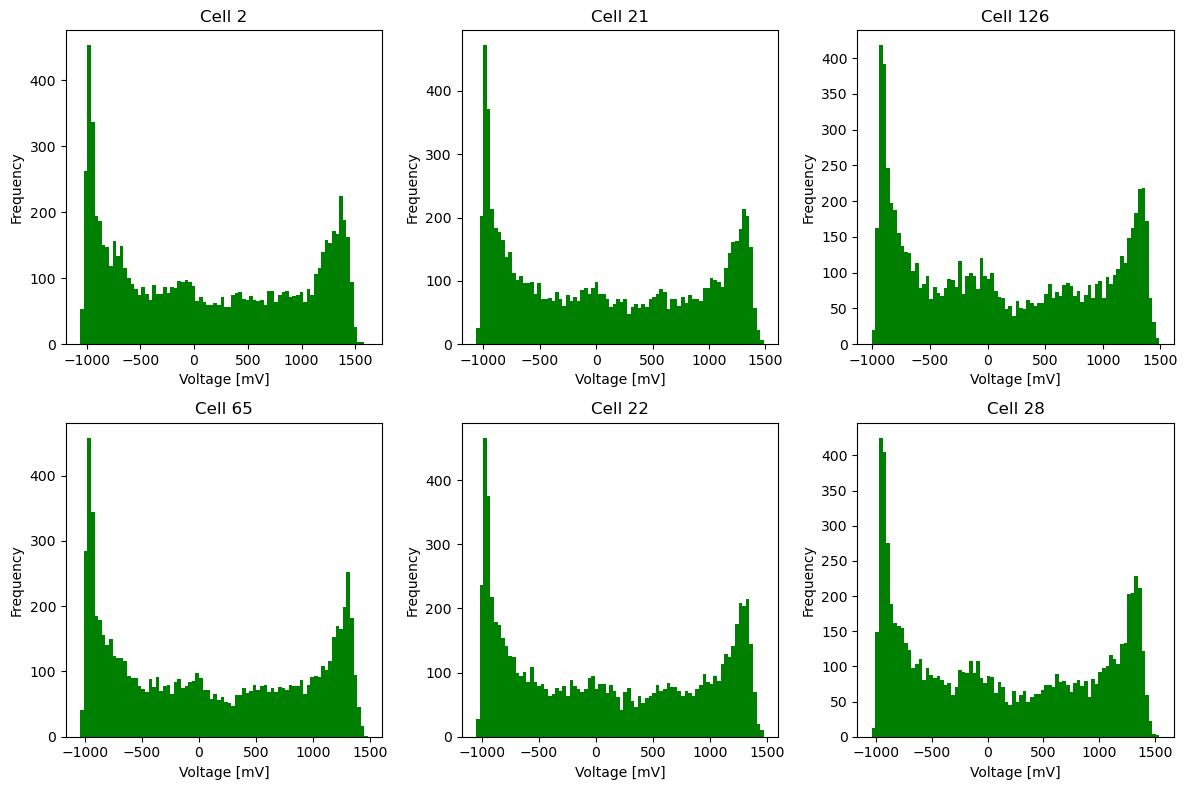

In [7]:
random_indices = np.random.choice(128, 6, replace=False)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

# Plot the histograms for the randomly selected indices
for i, idx in enumerate(random_indices):
    axes[i].hist(cell_data[idx], color='green', bins=80)
    axes[i].set_title(f"Cell {idx}")
    axes[i].set_xlabel('Voltage [mV]')
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

0.0


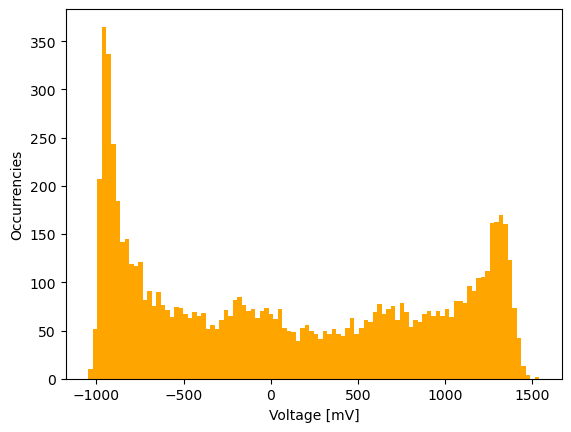

In [8]:
plt.hist(cell_data[111], color='orange',bins=100);
plt.xlabel("Voltage [mV]")
plt.ylabel("Occurrencies")
print(np.median(cell_data[111]))

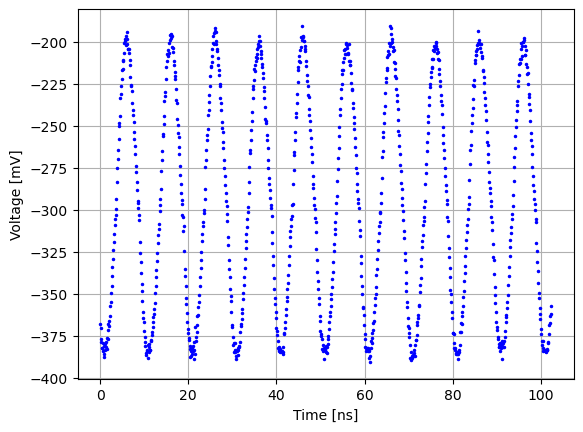

In [9]:
plt.plot(time,output[100],'.',color='blue',markersize=3,label="Ch. 4")
plt.grid()
plt.xlabel("Time [ns]")
plt.ylabel("Voltage [mV]");

* Let's perform a sinewave fit

Fitted parameters: A=-92.253, f=0.100, phi=0.923, C=-294.384


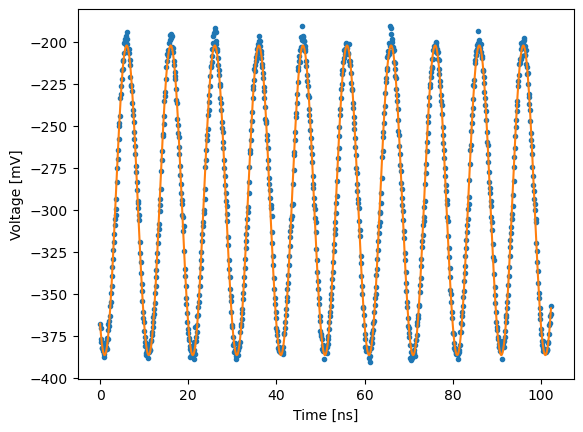

In [10]:
def sinewave(x, A, f, phi, c):
    return A * np.sin(2 * np.pi * f * x + phi) + c

p, _ = curve_fit(sinewave, time, output[100], p0=[2500, 0.1, 0, 0])

A_fit, f_fit, phi_fit, C_fit = p
print(f"Fitted parameters: A={A_fit:.3f}, f={f_fit:.3f}, phi={phi_fit:.3f}, C={C_fit:.3f}")

plt.plot(time, output[100], '.', label="Data")
plt.plot(time, sinewave(time, *p), label="Fit")
plt.xlabel("Time [ns]")
plt.ylabel("Voltage [mV]");

Seems a little better on the high and low peaks compared to the fit without corrction (Nalu_SineWave.ipynb)

* Now, we compare it to an ideal sinewave, without fitting, just use the vaalues I know (200mV amplitude...)

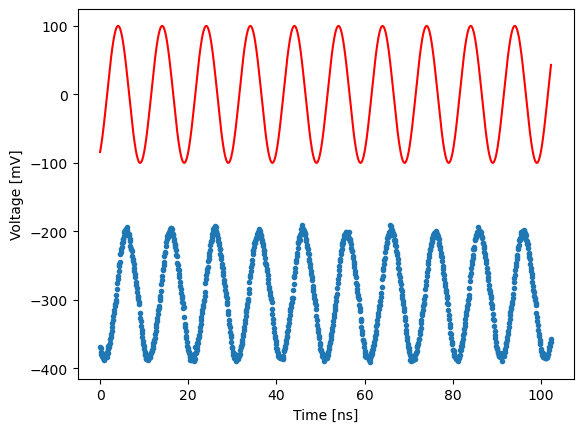

In [11]:
x = np.linspace(0,102.3,1024)
y = sinewave(x, 100, 0.1, -1, 0)
plt.plot(time, output[100],'.')
plt.plot(x,y, color='red')
plt.xlabel("Time [ns]")
plt.ylabel("Voltage [mV]");

* Zoom in in peaks to unseerstnd beetter wht is going on

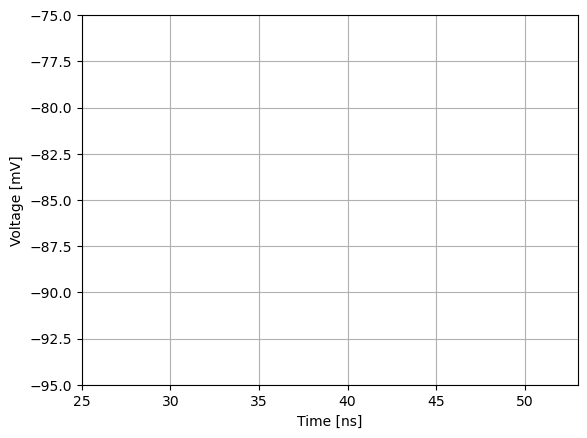

In [12]:
plt.plot(time, output[100], '.', label="Data")
plt.plot(time, sinewave(time, *p), label="Fit")
plt.xlabel("Time [ns]")
plt.ylabel("Voltage [mV]")
plt.xlim(25, 53)
plt.ylim(-95, -75)
plt.grid();

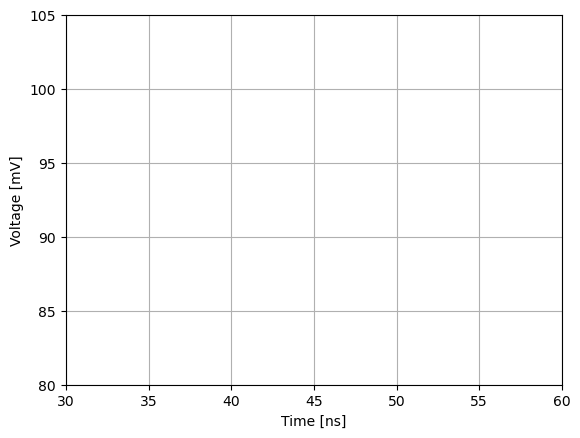

In [13]:
plt.plot(time, output[100], '.', label="Data")
plt.plot(time, sinewave(time, *p), label="Fit")
plt.xlabel("Time [ns]")
plt.ylabel("Voltage [mV]")
plt.xlim(30, 60)
plt.ylim(80, 105)
plt.grid();